## Importacion librerias y declaracion funciones

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import io


In [145]:
PRUEBA = 1
PARTE_PRUEBA = 'A'

In [146]:
def peticion_github(url_csv_raw, prueba, parte):
  download = requests.get(url_csv_raw).content
  iter_pd = pd.read_csv(io.StringIO(download.decode('utf-8')))
  iter_pd['prueba'] = prueba
  iter_pd['parte'] = parte

  if(parte == 'A'):
    iter_pd['parte'] = 'monitoreo'
    parte = 'B'
  else:
    iter_pd['parte'] = 'sensor'  
    parte = 'A'    
    prueba += 1

  return iter_pd, prueba, parte

## Seccion prueba 1 - outputs aleatorios

In [147]:
historico_sensor_monitoreo_df, PRUEBA, PARTE_PRUEBA  = peticion_github('https://raw.githubusercontent.com/jhonsbg/Sist-de-Monitoreo-ABC---Grupo-31/master/microservicio_monitor/historico_sensor_monitoreo.csv', PRUEBA, PARTE_PRUEBA)
historico_sensor_monitoreo_df = historico_sensor_monitoreo_df.rename(columns={'estado_sensor_monitoreado': 'estado_sensor'})
historico_sensor_monitoreo_df.tail(5)

,Fecha,estado_sensor,prueba,parte
498,11/09/2022 13:59:00,False,1,monitoreo
499,11/09/2022 13:59:00,False,1,monitoreo
500,11/09/2022 13:59:00,False,1,monitoreo
501,11/09/2022 13:59:00,True,1,monitoreo
502,11/09/2022 13:59:00,True,1,monitoreo


In [148]:
historico_sensor_df, PRUEBA, PARTE_PRUEBA = peticion_github('https://raw.githubusercontent.com/jhonsbg/Sist-de-Monitoreo-ABC---Grupo-31/master/microservicio_sensor/historico_sensor.csv', PRUEBA, PARTE_PRUEBA)
historico_sensor_df.tail(5)

,Fecha,estado_sensor,prueba,parte
498,11/09/2022 13:59:00,False,1,sensor
499,11/09/2022 13:59:00,False,1,sensor
500,11/09/2022 13:59:00,False,1,sensor
501,11/09/2022 13:59:00,True,1,sensor
502,11/09/2022 13:59:00,True,1,sensor


In [149]:
historico_sensor_monitoreo_df.groupby(['estado_sensor']).size()

estado_sensor
False    254
True     249
dtype: int64

In [150]:
historico_sensor_df.compare(historico_sensor_monitoreo_df, align_axis=1, keep_shape=False, keep_equal=False)

Fecha         parte           
     self other    self      other
0     NaN   NaN  sensor  monitoreo
1     NaN   NaN  sensor  monitoreo
2     NaN   NaN  sensor  monitoreo
3     NaN   NaN  sensor  monitoreo
4     NaN   NaN  sensor  monitoreo
..    ...   ...     ...        ...
498   NaN   NaN  sensor  monitoreo
499   NaN   NaN  sensor  monitoreo
500   NaN   NaN  sensor  monitoreo
501   NaN   NaN  sensor  monitoreo
502   NaN   NaN  sensor  monitoreo

[503 rows x 4 columns]

In [151]:
recopilacion_pruebas_df =  historico_sensor_monitoreo_df
recopilacion_pruebas_df = recopilacion_pruebas_df.append(historico_sensor_df, ignore_index=True)
recopilacion_pruebas_df.tail(5)

,Fecha,estado_sensor,prueba,parte
1001,11/09/2022 13:59:00,False,1,sensor
1002,11/09/2022 13:59:00,False,1,sensor
1003,11/09/2022 13:59:00,False,1,sensor
1004,11/09/2022 13:59:00,True,1,sensor
1005,11/09/2022 13:59:00,True,1,sensor


## Seccion prueba 2 tumbar el servicio

In [152]:
historico_sensor_monitoreo_prueba_1_df, PRUEBA, PARTE_PRUEBA = peticion_github('https://raw.githubusercontent.com/jhonsbg/Sist-de-Monitoreo-ABC---Grupo-31/master/microservicio_monitor/historico_sensorSinServicio_monitoreo.csv', PRUEBA, PARTE_PRUEBA)
historico_sensor_monitoreo_prueba_1_df = historico_sensor_monitoreo_prueba_1_df.rename(columns={'estado_sensor_monitoreado': 'estado_sensor'})
historico_sensor_monitoreo_prueba_1_df.tail(5)

,Fecha,estado_sensor,prueba,parte
495,11/09/2022 22:04:29,False,2,monitoreo
496,11/09/2022 22:04:31,False,2,monitoreo
497,11/09/2022 22:04:34,False,2,monitoreo
498,11/09/2022 22:04:36,False,2,monitoreo
499,11/09/2022 22:04:38,False,2,monitoreo


In [153]:
historico_sensor_prueba_1_df, PRUEBA, PARTE_PRUEBA = peticion_github('https://raw.githubusercontent.com/jhonsbg/Sist-de-Monitoreo-ABC---Grupo-31/master/microservicio_monitor/historico_sensorSinServicio_monitoreo.csv', PRUEBA, PARTE_PRUEBA)
historico_sensor_prueba_1_df = historico_sensor_prueba_1_df.rename(columns={'estado_sensor_monitoreado': 'estado_sensor'})
historico_sensor_prueba_1_df.tail(5)

,Fecha,estado_sensor,prueba,parte
495,11/09/2022 22:04:29,False,2,sensor
496,11/09/2022 22:04:31,False,2,sensor
497,11/09/2022 22:04:34,False,2,sensor
498,11/09/2022 22:04:36,False,2,sensor
499,11/09/2022 22:04:38,False,2,sensor


In [154]:
historico_sensor_prueba_1_df.compare(historico_sensor_monitoreo_prueba_1_df, align_axis=1, keep_shape=False, keep_equal=False)

parte           
       self      other
0    sensor  monitoreo
1    sensor  monitoreo
2    sensor  monitoreo
3    sensor  monitoreo
4    sensor  monitoreo
..      ...        ...
495  sensor  monitoreo
496  sensor  monitoreo
497  sensor  monitoreo
498  sensor  monitoreo
499  sensor  monitoreo

[500 rows x 2 columns]

In [155]:
recopilacion_pruebas_df = recopilacion_pruebas_df.append(historico_sensor_monitoreo_prueba_1_df, ignore_index=True)
recopilacion_pruebas_df = recopilacion_pruebas_df.append(historico_sensor_prueba_1_df, ignore_index=True)
recopilacion_pruebas_df.tail(5)

,Fecha,estado_sensor,prueba,parte
2001,11/09/2022 22:04:29,False,2,sensor
2002,11/09/2022 22:04:31,False,2,sensor
2003,11/09/2022 22:04:34,False,2,sensor
2004,11/09/2022 22:04:36,False,2,sensor
2005,11/09/2022 22:04:38,False,2,sensor


## Seccion Grafica

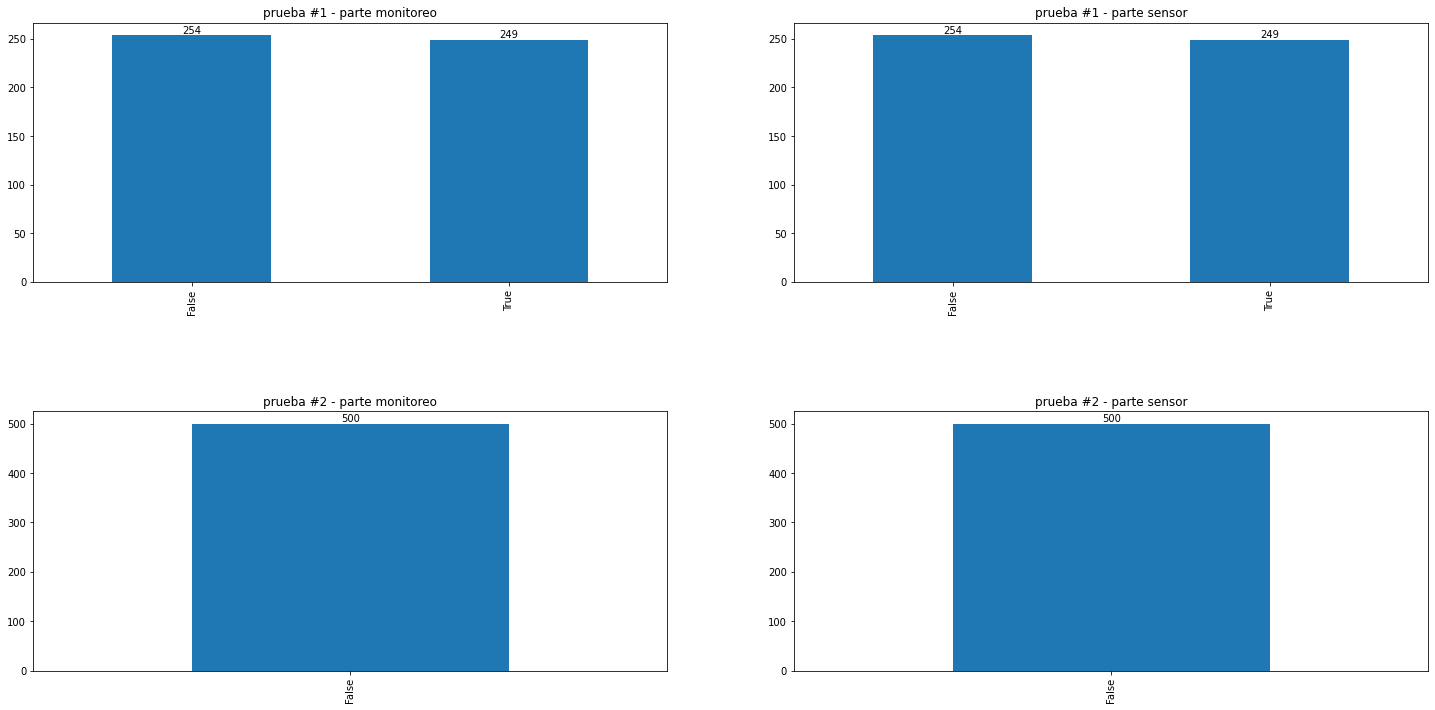

In [156]:
nume_archivos_pruebas = [1,2,3,4]
numPlot = 221

fig, ax = plt.subplots(2,3,figsize=(25,10))

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 1.0      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.5   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
def visualizarValores(rects,axSubplot,numPregunta,):
  for rect in rects:
    height = rect.get_height()
    axSubplot.text(rect.get_x() + rect.get_width() / 2, height+0.01, height, ha='center', va='bottom')
  ax.set_xlabel('')


numero_prueba = 1

for ind, numPregunta in enumerate(nume_archivos_pruebas):

  preguntaIndex = numPregunta-1
  iter_df = recopilacion_pruebas_df[0:0]
  ax= plt.subplot(numPlot)

  if (ind % 2 == 0):
    iter_df = recopilacion_pruebas_df[(recopilacion_pruebas_df['prueba']== numero_prueba ) & (recopilacion_pruebas_df['parte']== 'monitoreo' )]
    ax.set_title(f'prueba #{numero_prueba} - parte monitoreo')
  else:
    iter_df = recopilacion_pruebas_df[(recopilacion_pruebas_df['prueba']== numero_prueba ) & (recopilacion_pruebas_df['parte']== 'sensor' )]
    ax.set_title(f'prueba #{numero_prueba} - parte sensor')
    numero_prueba += 1
  iter_df.groupby(['estado_sensor']).size().plot.bar(ax=ax)
  visualizarValores(ax.patches, ax,preguntaIndex)

  numPlot += 1

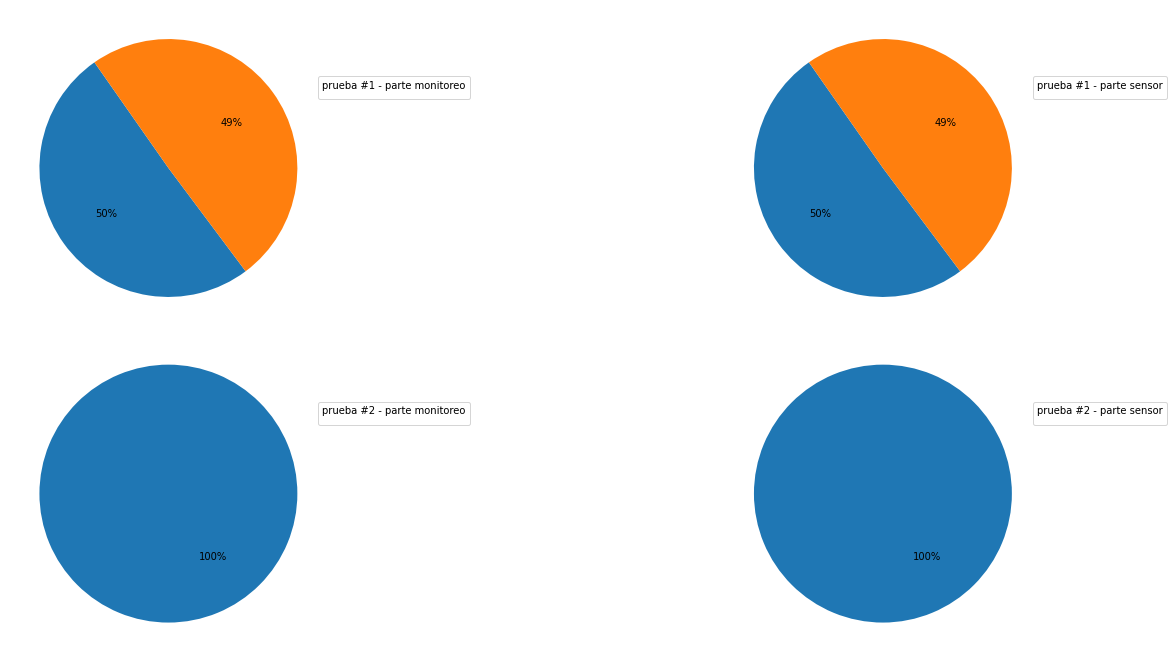

In [157]:
preguntasListPlot = [1,2,3,4]
numPlot = 221

fig, ax = plt.subplots(2,3,figsize=(25,10))

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 1.0      # the top of the subplots of the figure
wspace = 0.05   # the amount of width reserved for blank space between subplots
hspace = 0.01   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

def createLabels():
  listaEtiquetasAgrupadas = recopilacion_pruebas_df.groupby(['estado_sensor']).size().reset_index().values.tolist()
  acumList = []
  for etiqueta in listaEtiquetasAgrupadas:
    acumList.append(etiqueta[0])
  return acumList

numero_prueba = 1

for ind, numPregunta in enumerate(preguntasListPlot):
  preguntaIndex = numPregunta-1

  labels_plot = createLabels()
  ax = plt.subplot(numPlot, projection='rectilinear')

  iter_df = recopilacion_pruebas_df[0:0]

  if (ind % 2 == 0):
    iter_df = recopilacion_pruebas_df[(recopilacion_pruebas_df['prueba']== numero_prueba ) & (recopilacion_pruebas_df['parte']== 'monitoreo' )]
    ax = (plt.legend(labels_plot, bbox_to_anchor = (0.95, 0.8), title = f'prueba #{numero_prueba} - parte monitoreo'))
  else:
    iter_df = recopilacion_pruebas_df[(recopilacion_pruebas_df['prueba']== numero_prueba ) & (recopilacion_pruebas_df['parte']== 'sensor' )]
    ax = (plt.legend(labels_plot, bbox_to_anchor = (0.95, 0.8), title = f'prueba #{numero_prueba} - parte sensor'))
    numero_prueba += 1


  ax = (plt.pie(iter_df.groupby(['estado_sensor']).size(), autopct='%1.1d%%', startangle=125))

  
  numPlot += 1